In [14]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [15]:
hotels = pd.concat(map(pd.read_csv, ['Clean_Atlanta.csv', 'Clean_Boston.csv', 'Clean_Chicago.csv', 'Clean_Dallas.csv', 'Clean_Houston.csv'
, 'Clean_LasVegas.csv', 'Clean_Miami.csv', 'Clean_NewOrleans.csv', 'Clean_NewYork.csv', 'Clean_Orlando.csv'
, 'Clean_Phoenix.csv', 'Clean_SanDiego.csv', 'Clean_Washington.csv']), ignore_index=True)

In [16]:
le = LabelEncoder()
# label encode city rows
hotels['City'] = le.fit_transform(hotels['City'])
# label encode Allowing pets rows
hotels['Allowing pets'] = le.fit_transform(hotels['Allowing pets'])
df = hotels.drop(labels = ['Name'], axis=1)

0.8077285579641847


/Users/yairnagar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


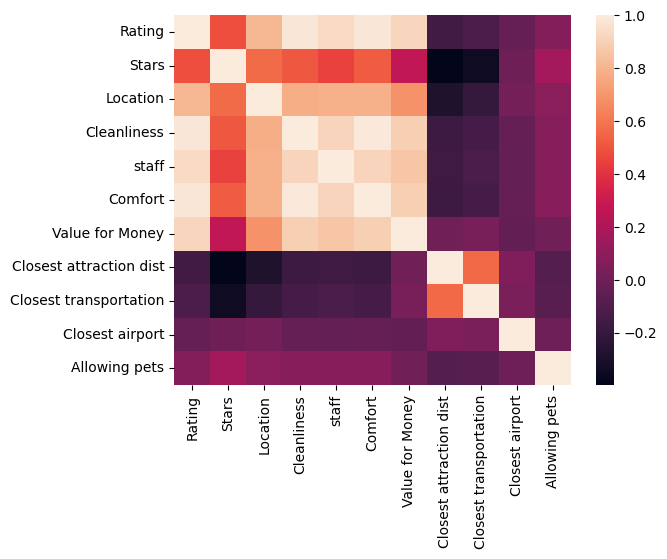

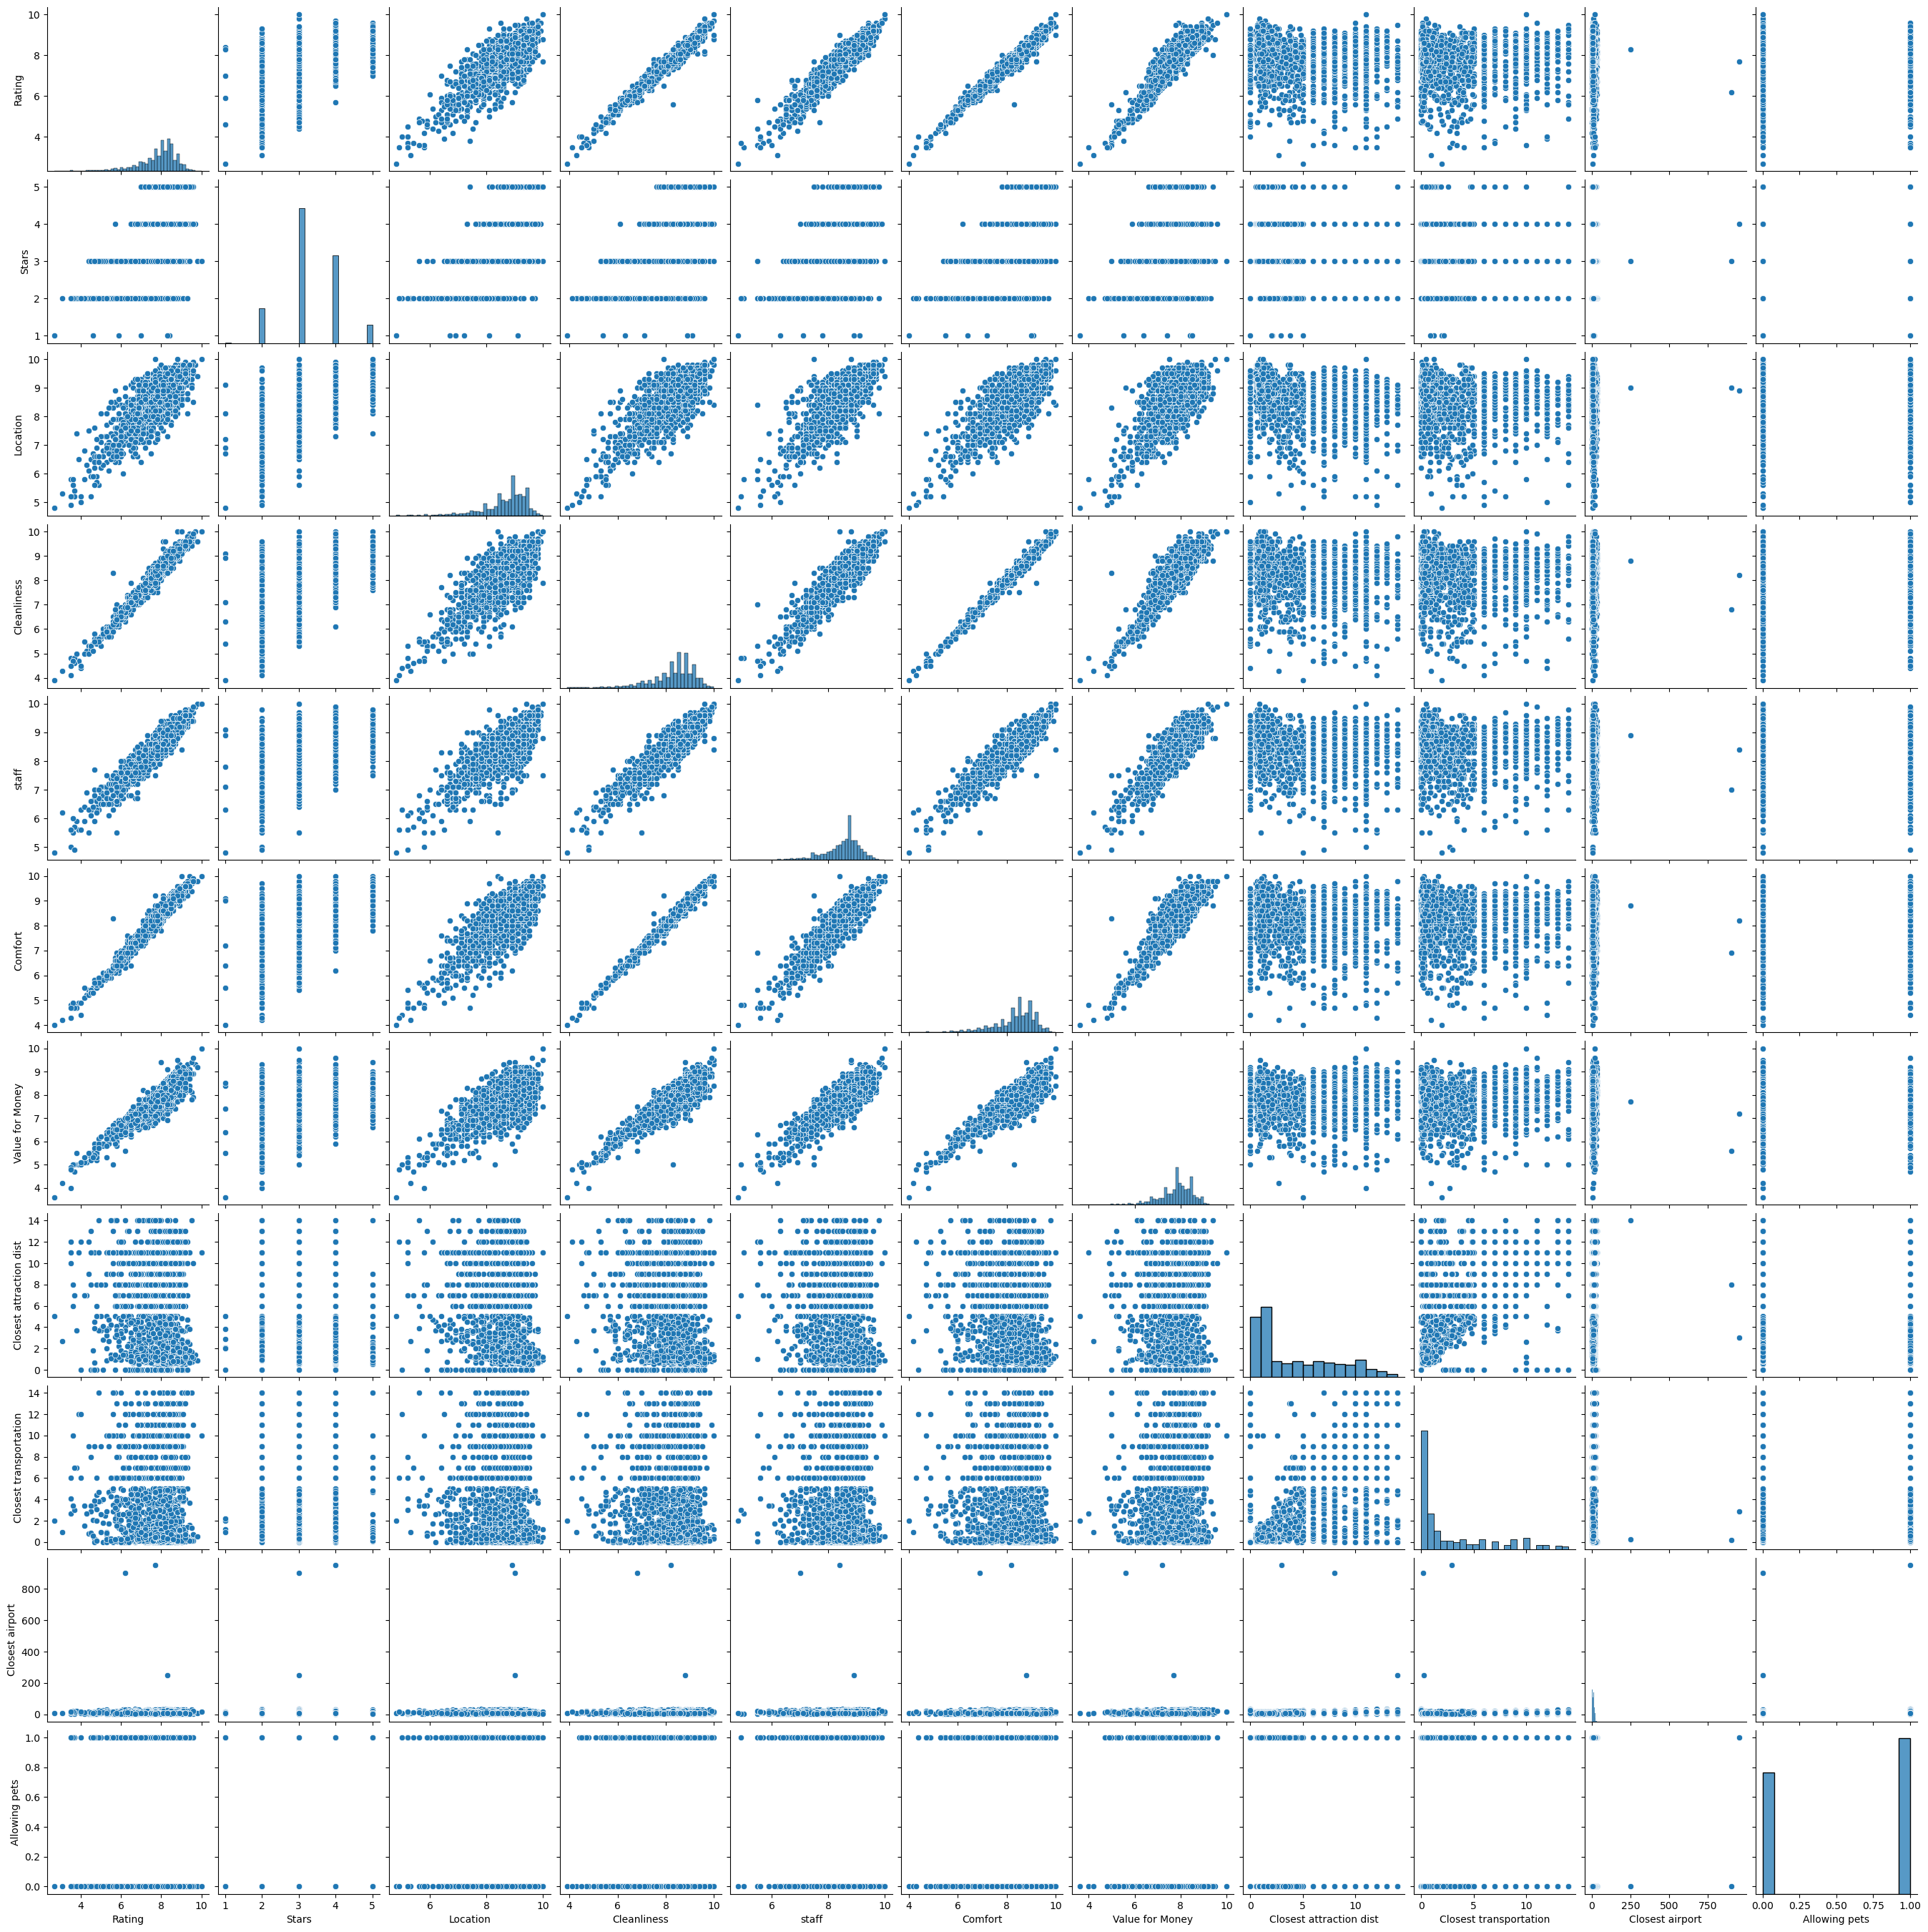

In [20]:
df_model = df.copy()
# make a range of price values instead of price values 
df_model['Price range'] = pd.cut(df.Price, bins = 6)
df_model['Price range'] = le.fit_transform(df_model['Price range'])
df_model.drop(inplace= True, labels=['Price'],axis=1)
# get the relevant rows that help to predict
features = df_model[['Rating','Stars', 'Location', 'Cleanliness','staff','Comfort', 'Value for Money',
       'Closest attraction dist', 'Closest transportation', 'Closest airport', 'Allowing pets']]
#heatmap
#correlations
sns.heatmap(features.corr())
sns.pairplot(features)

# define the test sizes and parameters of the tarin and test
x = df_model[features.columns]
y = pd.Series(df_model['Price range'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# scaling 
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

lr = LogisticRegression()
clf_model = lr.fit(x_train, y_train)
y_pred = clf_model.predict(x_test)

resDF = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
print(lr.score(x,y))